### Tutorial 5: Probability Distribution Time Animation

>> Charlie Duke  
Physics Department, Grinnell College   
October 2020

Revision of notebook developed by:  
>> Emily Griffin '17 and Androniki Mitrou '17  
>> Grinnell College 
>> May 2015  

**Prerequisites: completion of `tutorial4_composite.ipynb` and read/write tutorials**   
   
This notebook illustrates composite wavefunctions created by summing stationary-state wavefunctions produced by the QuantumWell solver.  Specifically, it provides an animation over time of the composite wavefunction from the first two stationary states of a potential well with a single internal potential barrier.  

The potential well details and the stationary state wavefunctions were previously created using the potential-well solver with the results stored in a .dpw file. After adding the time dependent function, the animated plot occurs in an external window, possibly hidden behind this window. If so, move this window to find it.

You can use this notebook in any directory provided that you copy the `getPath.py` file
as well `psi1.dpw` and `psi2.dpw` files to that directory  

In this notebook we will:

*  Read stationary state wavefunctions produced by the quantum potential-well solver
*  Verify Normalization
*  Create composite wavefunctions and check normalization
*  Track the composite probability density over time with an animation


In [ ]:
# if you want to see the details of this magic function, execute this cell
#%pylab?
%matplotlib -l

In [1]:
# this animation with ipympl backend works fine inline for macos.  need to check out with 
# windows. Older version with %pylab works ok in windows, but no inline plots

# plots inline,  have to install these first, not in anaconda standard packages
# conda install ipywidgets, ipympl
%matplotlib widget

# plots in separate window
#%matplotlib
import matplotlib.pyplot as plt
#import plt.get_current_fig_manager.show
import numpy as np
#pi = np.pi

#sqrt = np.sqrt
#%pylab 
plt.ion()

import sys,os
from matplotlib import animation

%load_ext autoreload
%autoreload 2

In [2]:
# We have to add the path to the src folder to sys.path
# as in previous tutorials

from getPath import setPath
setPath(sys.path)

# check out sys.path if you want
# The first element should be the path to the src directory
if True:
    print(sys.path)


['C:\\Users\\duke\\Github\\QuantumWell\\src', 'C:\\Users\\duke\\Github\\QuantumWell\\Tutorials', 'C:\\Users\\duke\\Anaconda3\\python38.zip', 'C:\\Users\\duke\\Anaconda3\\DLLs', 'C:\\Users\\duke\\Anaconda3\\lib', 'C:\\Users\\duke\\Anaconda3', '', 'C:\\Users\\duke\\Anaconda3\\lib\\site-packages', 'C:\\Users\\duke\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\duke\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\duke\\Anaconda3\\lib\\site-packages\\Pythonwin']


In [3]:
# your path is correctly set if this import is successful (no error message)
from DataPotentialWell import *

In [4]:
# create class instances and read the existing .dpw files which should be in 
#   this directory
# these are the wavefunction files from quantumWell.py
filePsi1 = "psi1.dpw"
filePsi2 = "psi2.dpw"

dpw1 = DataPotentialWell()
dpw1.readDpwFile(filePsi1)

dpw2 = DataPotentialWell()
dpw2.readDpwFile(filePsi2)

# print well properties, change False to True
if False:
    # print the well data for dpw1 or dpw2, 
    print('dpw1 data  ')
    dpw1.printData()
    print('\n')
    print('dpw2 data')
    dpw2.printData()
    print('\n')

# get the x, psi, and psiPrime arrays from the data class instances
#   psiPrime is the first-derivative of psi
x = dpw1.getXArray()
print("x.shape ",x.shape)
#ind = 10

# get the distance between x bin edges
delX = dpw1.getXBinWidth()
print("delX ",delX," nm")

# get the psi arrays, they should already be normalized
psi1N = dpw1.getPsiArrayNormalized()
psi2N = dpw2.getPsiArrayNormalized()

# get the potential array
vArray = dpw1.getVArray()

# here are the stationary state energies for the two states
#   the energies associated with the psi wavefunction
e1 = dpw1.getPsiEnergy()
e2 = dpw2.getPsiEnergy()
print("energy for state1 and state2 ",e1,e2,)

# check normalization
n1 = sum(psi1N*psi1N)*delX
n2 = sum(psi2N*psi2N)*delX
print('check normalization')
print("sum(psi*psi)*delX",n1,n2)

x.shape  (500,)
delX  0.0008016032064128256  nm
energy for state1 and state2  6.935564600702201 9.626514993545921
check normalization
sum(psi*psi)*delX 1.0000000000000009 0.9999999999999987


In [5]:
vMax = vArray.max()
wellWid = dpw1.getBasicWellProperties()[0]
print('vMax ',vMax)

vMax  40.0


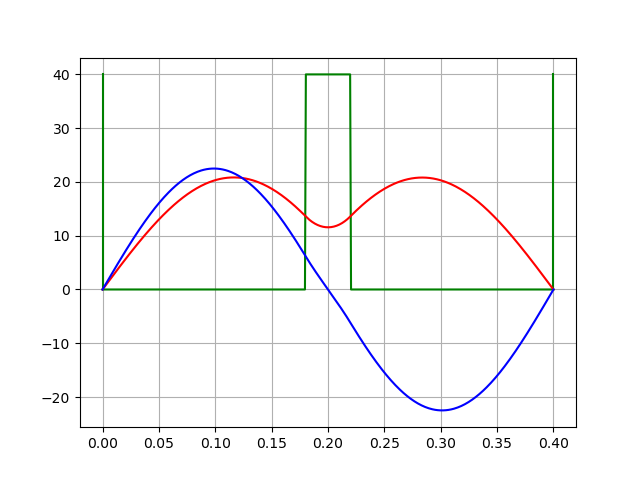

In [6]:
# check out the internal potential array and the two spatial wavefunctions as figure 1
# all plots in this tutorial are interactive plots and in separate windows
# they will not be inline plots!

plt.figure(1)
plt.plot(x,vArray,'g')
plt.plot([0.0,0.0],[0.0,vMax],'g')
plt.plot([wellWid,wellWid],[0.0,vMax],'g')

zoom1 = 10.0
plt.plot(x,psi1N*zoom1,'r')
plt.plot(x,psi2N*zoom1,'b')

plt.grid()

In [ ]:
# close the figure if you produced a plot in previous cell.
plt.close(1)


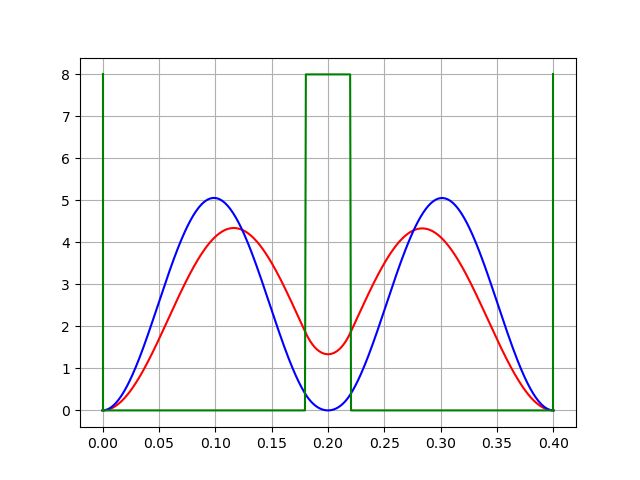

In [7]:
# These are the two probability distributions at t = 0 as figure 2
if True:
    plt.figure(2)
    plt.plot(x,psi1N*psi1N,'r')
    plt.plot(x,psi2N*psi2N,'b')

    zoom = 0.2
    plt.plot(x,vArray*zoom,'g')
    plt.plot([0.0,0.0],[0.0,vMax*zoom],'g')
    plt.plot([wellWid,wellWid],[0.0,vMax*zoom],'g')

    plt.grid()


In [ ]:
# close all figures, i.e. 1 and 2 if you wish
plt.close('all')

In [8]:
# are psi1N and psi2N orthogonal, this is worth a check
print("sum(psi1N*psi2N)*delX ",sum(psi1N*psi2N)*delX)

sum(psi1N*psi2N)*delX  0.0006926071666804211


In [9]:
# form a composite psi to localize the electron in the left subwell

# let psi evolve with time where the period is set to 1.0
# for convenience and plot probability every 1/8th period

In [10]:
# have a look at the probability density of the composite wavefunction for a
# given time between 0.0 and 1.0 seconds, type in various time ()
# at least try time = 0.0, 0.25, 0.50, 0.75, and 1.0

# closes previous graph, comment out to accumulate graphs on the same figure
plt.close(plt.gcf().number)
if True:
    time = 0.0     # choose a time here

    t1 = time*2.0*np.pi
    
    # this is the composite wavefunction (it's a complex number)
    psi = (1/np.sqrt(2.0))*(psi1N + psi2N*np.exp(t1*1j))

    prob = np.conj(psi) * psi
    plt.plot(x,np.real(prob),'r')
    plt.plot(x,vArray,'g')
    plt.plot([0.0,0.0],[0.0,vMax],'g')
    plt.plot([wellWid,wellWid],[0.0,vMax],'g')
    
    
    plt.grid()
    
    

In [11]:
# you may find this useful later to find the oscillation frequency in Hz.
import scipy.constants
# help(scipy.constants)
# scipy.constants.find('electron')
if False:
    for ss in scipy.constants.find("Planck"):
        print(ss)

    # you can get constants from the value method once you have the find results 
    heVSec  = scipy.constants.value("reduced Planck constant in eV s")
    heVnSec = heVSec*1.0e9
    print("\nreduced Planck's constant in eV-nSec ",heVnSec)


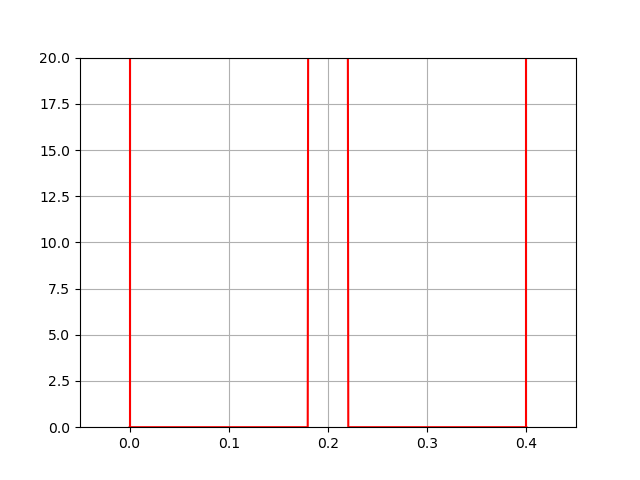

In [12]:
# now ready to setup and execute the animation 

# set axis limits, xlim1 and ylim1. Get values from dpw1 or dpw2
# x axis starts below xmin and extends above xmax
xlim1 = (dpw1.xmin - 0.05, dpw1.xmax + 0.05)

# might as well do multiples of 10.0 for yaxis maximum
# get maximum of probability density (we're plotting the prob.den.)
psiSum = psi1N + psi2N
tmpM   = max(psiSum*psiSum)
ym     = int(tmpM/10.0 + 1) * 10.0

# set yaxis limits
ylim1 = (0.0,ym)

# open a figure, get the axes reference and the line reference
#   that will change from plot to plot in the animation
fig   = plt.figure()
ax    = plt.axes(xlim=xlim1, ylim=ylim1)
line, = ax.plot([],[], lw=2)

# turn the grid on
plt.grid()

#  outline the single barrier with vertical red lines
#  get xmin and xmax (the limits of the deq solution from barriers array
#  look at the previous printdata screen output to see the barriers array
# this only is for a single barrier well, otherwise have to loop thru barriers

plt.plot(x,vArray,'r')
# outline the well edges with red lines
wellXmin = dpw1.xmin
wellXmax = dpw1.xmax 
plt.plot([wellXmin,wellXmin],[0.0,ym],'r')
plt.plot([wellXmax,wellXmax],[0.0,ym],'r')

# FuncAnimation requires an initialization function.  This just
# lets FuncAnimation know that this line reference is the one to use
# The function does no plotting since set_data is empty.
def init():
    line.set_data([], [])
    return line,

# function used in the FuncAnimation
def animate(t):
    # period is 1.0, so multiply t by 2*pi
    t1     = t*2.0*np.pi
    psi    = (1/np.sqrt(2.0))*(psi1N + psi2N*np.exp(t1*1j))
    absPsi = np.absolute(psi)
    
    # this makes the plot, by moving data into line's set_data
    #   method
    line.set_data(x,absPsi*absPsi)
    
    return line

# these are the times, 0.0 to 1.0, every 0.01 units
num_plots = 100
ts = np.linspace(0.0,1.0,num_plots)

# time interval between plots in milliseconds, controls oscillation speed
#ti = 10
ti = 20

# for blit True, plot only changes from previous plot to speed up plot calls
# blit must be False on macOS (changing the backend will also work, but this is easier)
# use non-inline plots for animation

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=ts, interval=ti, 
                               blit=False)